In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
#from duckduckgo_search import ddg

In [5]:
noticias1 = []

# Loop por todas as páginas (de 1 a 57)
for i in range(1, 59):
    link = f"https://www.boatos.org/saude/page/{i}"
    
    response = requests.get(link)
    response = response.content
    soup = BeautifulSoup(response, "html.parser")

    # Encontrar todos os artigos na página
    articles = soup.find_all('article')

    # Verificar se os artigos foram encontrados
    if articles:
        for article in articles:
            # Tentar extrair o título do artigo
            title_tag = article.find('h2')
            if title_tag:
                title = title_tag.get_text(strip=True)
            else:
                title = "No title found"
        
            # Tentar extrair o link do artigo
            link_tag = article.find('a')
            if link_tag and 'href' in link_tag.attrs:
                link = link_tag['href']
                
                # Filtrar apenas os links que contêm "vacina" ou "vacinacao"
                if "vacina" in link or "vacinacao" in link:
                    noticias1.append({"title": title, "link": link})

# Convertendo a lista de notícias em um DataFrame do pandas
df1 = pd.DataFrame(noticias1)

# Adicionando a coluna 'site' com o valor 'boatos.org'
df1['Site'] = 'boatos.org'

# Exibindo o DataFrame
df1

,title,link,Site
0,Fake news sobre nanobots em vacinas contra Cov...,https://www.boatos.org/saude/nanobots-foram-en...,boatos.org
1,É falso que Brasil seja o único país do mundo ...,https://www.boatos.org/saude/brasil-e-o-unico-...,boatos.org
2,Homem que “pediu desculpas a não vacinados” nã...,https://www.boatos.org/saude/ministro-e-lider-...,boatos.org
3,Vídeo sobre sequelas severas das vacina contra...,https://www.boatos.org/saude/video-sobre-seque...,boatos.org
4,Não há provas de que vacinas e medicamentos es...,https://www.boatos.org/saude/faltam-vacinas-e-...,boatos.org
...,...,...,...
273,"Causa da microcefalia é vacina para gestantes,...",https://www.boatos.org/saude/causa-da-microcef...,boatos.org
274,Microcefalia foi causada por vacina vencida de...,https://www.boatos.org/saude/microcefalia-foi-...,boatos.org
275,Vacina contra o câncer de pele e rins é desenv...,https://www.boatos.org/saude/vacina-contra-can...,boatos.org
276,Vacina contra a gripe tem nível de mercúrio le...,https://www.boatos.org/saude/alerta-falso-vaci...,boatos.org


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

noticias2 = []

# Loop por todas as páginas (de 1 a 100)
for i in range(1, 101):
    link = f"https://medicospelavidacovid19.com.br/artigos/{i}/"
    
    response = requests.get(link)
    soup = BeautifulSoup(response.content, "html.parser")

    # Encontrar todos os links que podem conter artigos
    links = soup.find_all('a', href=True)

    # Verificar se os links foram encontrados e filtrar por "vacina" ou "vacinacao"
    for link_tag in links:
        link = link_tag['href']
        
        # Filtrar links que contêm "vacina" ou "vacinacao"
        if "vacina" in link or "vacinacao" in link:
            # Tentar extrair o título do artigo
            title = link_tag.get_text(strip=True)
            
            # Adicionar apenas se o título não estiver vazio
            if title:
                noticias2.append({"title": title, "link": link})

# Convertendo a lista de notícias em um DataFrame do pandas
df2 = pd.DataFrame(noticias2)

# Remover títulos duplicados
df2 = df2.drop_duplicates(subset='title')

df2['Site'] = 'Médicos pela Vida'

# Exibindo o DataFrame
df2

,title,link,Site
0,"Finlândia, a gripe aviária e a vacina",https://medicospelavidacovid19.com.br/opiniao/...,Médicos pela Vida
1,Os que defendem obrigatoriedade das vacinas CO...,https://medicospelavidacovid19.com.br/opiniao/...,Médicos pela Vida
2,Audiência Pública no Senado da República em Br...,https://medicospelavidacovid19.com.br/opiniao/...,Médicos pela Vida
3,"Qual a relação entre COVID, vacina e miocardite?",https://medicospelavidacovid19.com.br/opiniao/...,Médicos pela Vida
4,O CFM está certo em querer conhecer o consenso...,https://medicospelavidacovid19.com.br/opiniao/...,Médicos pela Vida
5,O Ministério da Saúde desinforma ao afirmar qu...,https://medicospelavidacovid19.com.br/opiniao/...,Médicos pela Vida
6,De pré-print a dogma: a ironia científica de u...,https://medicospelavidacovid19.com.br/opiniao/...,Médicos pela Vida
7,Considerações críticas para as vacinas contra ...,https://medicospelavidacovid19.com.br/geral/co...,Médicos pela Vida
8,Meta-análise mostra que a vacinação infantil e...,https://medicospelavidacovid19.com.br/opiniao/...,Médicos pela Vida
9,Sobre a vacinação contra COVID-19 em crianças,https://medicospelavidacovid19.com.br/opiniao/...,Médicos pela Vida


In [7]:
def get_noticias(url, keywords):
    """
    Função que coleta notícias de uma página específica baseada em palavras-chave nos links.
    """
    noticias = []
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Encontrar todos os links na página
    links = soup.find_all('a', href=True)

    # Filtrar e armazenar apenas os links que contêm as palavras-chave
    for link_tag in links:
        link = link_tag['href']
        title = link_tag.get_text(strip=True)
        
        # Verificar se a palavra-chave está no link ou no título
        if any(keyword in link.lower() for keyword in keywords):
            # Se o link não é absoluto, fazê-lo absoluto
            if not link.startswith('http'):
                link = requests.compat.urljoin(url, link)

            # Adicionar apenas se o título não estiver vazio
            if title:
                noticias.append({"title": title, "link": link})
    
    return noticias


def crawl_site(url, depth=2):
    if depth == 0 or url in visited_links:
        return
    
    visited_links.add(url)
    noticias3.extend(get_noticias(url, keywords))

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Encontrar todos os links na página e seguir
    links = soup.find_all('a', href=True)

    for link_tag in links:
        link = link_tag['href']

        # Verificar se o link é interno e não foi visitado
        if not link.startswith('http'):
            link = requests.compat.urljoin(base_url, link)

        if base_url in link and link not in visited_links:
            crawl_site(link, depth-1)

,title,link,Site
0,"Os benefícios, segundo a agência, são muito su...",https://www.gov.br/secom/pt-br/fatos/brasil-co...,Fato ou Fake (G1)
1,o país teve que incinerar 39 milhões de doses ...,https://g1.globo.com/saude/noticia/2023/12/22/...,Fato ou Fake (G1)
2,como fez quando associou a vacina da Covid à Aids,https://g1.globo.com/politica/noticia/2022/08/...,Fato ou Fake (G1)
3,É #FAKE que o Brasil é o único país a exigir v...,https://g1.globo.com/fato-ou-fake/noticia/2024...,Fato ou Fake (G1)
4,Leia aqui,https://www.gov.br/saude/pt-br/assuntos/saude-...,Fato ou Fake (G1)


In [ ]:
# Parâmetros de busca
base_url = "https://g1.globo.com/fato-ou-fake/"
keywords = ["vacina", "vacinacao"]

# Coletar notícias da página inicial e seguir links para outras páginas
noticias3 = []
visited_links = set()

# Iniciar a coleta de dados
crawl_site(base_url, depth=3)

# Converter a lista de notícias em um DataFrame do pandas
df3 = pd.DataFrame(noticias3)

# Remover títulos duplicados
df3 = df3.drop_duplicates(subset='title')

df3['Site'] = 'Fato ou Fake (G1)'

# Exibir o DataFrame filtrado
df3

In [8]:
def get_noticias(url, keywords):
    """
    Função que coleta notícias de uma página específica baseada em palavras-chave nos links.
    """
    noticias = []
    response = requests.get(url)
    
    # Tratamento de encoding
    response.encoding = response.apparent_encoding

    soup = BeautifulSoup(response.content, "html.parser")

    # Encontrar todos os links na página
    links = soup.find_all('a', href=True)

    # Filtrar e armazenar apenas os links que contêm as palavras-chave
    for link_tag in links:
        link = link_tag['href']
        title = link_tag.get_text(strip=True)
        
        # Verificar se a palavra-chave está no link ou no título
        if any(keyword in link.lower() for keyword in keywords):
            # Se o link não é absoluto, fazê-lo absoluto
            if not link.startswith('http'):
                link = requests.compat.urljoin(url, link)

            # Adicionar apenas se o título não estiver vazio
            if title:
                noticias.append({"title": title, "link": link})
    
    return noticias

# Parâmetros de busca
base_url = "https://www.gov.br/saude/pt-br"
keywords = ["vacina", "vacinacao"]

# Coletar notícias da página inicial e seguir links para outras páginas
noticias4 = []
visited_links = set()

def crawl_site(url, depth=2):
    if depth == 0 or url in visited_links:
        return
    
    visited_links.add(url)
    noticias4.extend(get_noticias(url, keywords))

    response = requests.get(url)
    response.encoding = response.apparent_encoding
    soup = BeautifulSoup(response.content, "html.parser")

    # Encontrar todos os links na página e seguir
    links = soup.find_all('a', href=True)

    for link_tag in links:
        link = link_tag['href']

        # Verificar se o link é interno e não foi visitado
        if not link.startswith('http'):
            link = requests.compat.urljoin(base_url, link)

        if base_url in link and link not in visited_links:
            crawl_site(link, depth-1)

# Iniciar a coleta de dados
crawl_site(base_url, depth=3)

# Converter a lista de notícias em um DataFrame do pandas
df4 = pd.DataFrame(noticias4)

# Remover títulos duplicados
df4 = df4.drop_duplicates(subset='title')

df4['Site'] = 'gov.br/saude'

# Exibir o DataFrame filtrado
df4

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


,title,link,Site
0,Vacinação,https://www.gov.br/saude/pt-br/vacinacao,gov.br/saude
1,Calendário de Vacinação,https://www.gov.br/saude/pt-br/vacinacao/calen...,gov.br/saude
2,Calendário Técnico Nacional de Vacinação,https://www.gov.br/saude/pt-br/vacinacao/calen...,gov.br/saude
3,Atividades de vacinação de alta qualidade,https://www.gov.br/saude/pt-br/vacinacao/avaq,gov.br/saude
4,Distribuição de Imunobiológicos,https://www.gov.br/saude/pt-br/vacinacao/distr...,gov.br/saude
...,...,...,...
6022,Margareth Dalcolmo,https://www.gov.br/saude/pt-br/campanhas-da-sa...,gov.br/saude
6023,Acesse as Peças do Movimento Nacional pela Va...,https://www.gov.br/saude/pt-br/campanhas-da-sa...,gov.br/saude
6505,Acesse para saber como emitir o Certificado Na...,https://www.gov.br/pt-br/servicos/certificado-...,gov.br/saude
6506,Acesse para saber como emitir o Certificado In...,https://www.gov.br/pt-br/servicos/obter-o-cert...,gov.br/saude


In [9]:
def get_noticias_aosfatos(url, keywords):
    """
    Função que coleta notícias de uma página específica baseada em palavras-chave nos links.
    """
    noticias = []
    response = requests.get(url)
    
    # Tratamento de encoding
    response.encoding = response.apparent_encoding

    soup = BeautifulSoup(response.content, "html.parser")

    # Encontrar todos os links na página
    links = soup.find_all('a', href=True)

    # Filtrar e armazenar apenas os links que contêm as palavras-chave
    for link_tag in links:
        link = link_tag['href']
        title = link_tag.get_text(strip=True)
        
        # Verificar se a palavra-chave está no link ou no título
        if any(keyword in link.lower() for keyword in keywords):
            # Se o link não é absoluto, fazê-lo absoluto
            if not link.startswith('http'):
                link = requests.compat.urljoin(url, link)

            # Adicionar apenas se o título não estiver vazio
            if title:
                noticias.append({"title": title, "link": link})
    
    return noticias

# Parâmetros de busca
base_url_aosfatos = "https://www.aosfatos.org"
keywords = ["vacina", "vacinacao"]

# Coletar notícias da página inicial e seguir links para outras páginas
noticias_aosfatos = []
visited_links_aosfatos = set()

def crawl_site_aosfatos(url, depth=2):
    if depth == 0 or url in visited_links_aosfatos:
        return
    
    visited_links_aosfatos.add(url)
    noticias_aosfatos.extend(get_noticias_aosfatos(url, keywords))

    response = requests.get(url)
    response.encoding = response.apparent_encoding
    soup = BeautifulSoup(response.content, "html.parser")

    # Encontrar todos os links na página e seguir
    links = soup.find_all('a', href=True)

    for link_tag in links:
        link = link_tag['href']

        # Verificar se o link é interno e não foi visitado
        if not link.startswith('http'):
            link = requests.compat.urljoin(base_url_aosfatos, link)

        if base_url_aosfatos in link and link not in visited_links_aosfatos:
            crawl_site_aosfatos(link, depth-1)

# Iniciar a coleta de dados
crawl_site_aosfatos(base_url_aosfatos, depth=3)

# Converter a lista de notícias em um DataFrame do pandas
df_aosfatos = pd.DataFrame(noticias_aosfatos)

# Remover títulos duplicados
df_aosfatos = df_aosfatos.drop_duplicates(subset='title')

df_aosfatos['Site'] = 'Aos Fatos'

# Exibir o DataFrame filtrado
df_aosfatos

,title,link,Site
0,entrou com uma ação,https://www.aosfatos.org/bipe/agu-acao-telegra...,Aos Fatos
1,ter sido entregues ainda em 2020,https://noticias.uol.com.br/saude/ultimas-noti...,Aos Fatos
2,contra a imunização,https://www.aosfatos.org/noticias/bolsonaro-me...,Aos Fatos
3,2,https://noticias.uol.com.br/saude/ultimas-noti...,Aos Fatos
4,1,https://www.aosfatos.org/noticias/bolsonaro-me...,Aos Fatos
5,no dia 20 de dezembro,https://diariodorio.com/paes-quer-trazer-a-vac...,Aos Fatos
6,Diário do Rio,https://diariodorio.com/paes-quer-trazer-a-vac...,Aos Fatos


In [10]:
from urllib.parse import urljoin

def get_noticias(url, keywords):
    """
    Função que coleta notícias de uma página específica baseada em palavras-chave nos links.
    """
    noticias = []
    response = requests.get(url)
    response.encoding = response.apparent_encoding
    soup = BeautifulSoup(response.content, "html.parser")

    # Encontrar todos os links na página
    links = soup.find_all('a', href=True)

    # Filtrar e armazenar apenas os links que contêm as palavras-chave
    for link_tag in links:
        link = link_tag['href']
        title = link_tag.get_text(strip=True)
        
        # Verificar se a palavra-chave está no link ou no título
        if any(keyword in link.lower() for keyword in keywords):
            # Se o link não é absoluto, fazê-lo absoluto
            if not link.startswith('http'):
                link = urljoin(url, link)

            # Adicionar apenas se o título não estiver vazio
            if title:
                noticias.append({"title": title, "link": link})
    
    return noticias

def crawl_site(url, base_url, keywords, depth=3):
    """
    Função recursiva para percorrer todo o site, coletando notícias relevantes.
    """
    visited_links = set()
    noticias = []

    def _crawl(url, current_depth):
        if current_depth == 0 or url in visited_links:
            return
        
        visited_links.add(url)
        noticias.extend(get_noticias(url, keywords))

        response = requests.get(url)
        response.encoding = response.apparent_encoding
        soup = BeautifulSoup(response.content, "html.parser")

        # Encontrar todos os links na página e seguir
        links = soup.find_all('a', href=True)

        for link_tag in links:
            link = link_tag['href']
            if not link.startswith('http'):
                link = urljoin(base_url, link)

            if base_url in link and link not in visited_links:
                _crawl(link, current_depth - 1)

    _crawl(url, depth)
    return noticias

# Parâmetros de busca
base_url = "https://www1.folha.uol.com.br/equilibrioesaude/"
keywords = ["vacina", "vacinacao"]

# Coletar notícias do site inteiro, seguindo links internos
noticias_folha = crawl_site(base_url, base_url, keywords, depth=3)

# Converter a lista de notícias em um DataFrame do pandas
df_folha = pd.DataFrame(noticias_folha)

# Remover títulos duplicados
df_folha = df_folha.drop_duplicates(subset='title')

df_folha['Site'] = 'Folha'

# Exibir o DataFrame filtrado
df_folha

,title,link,Site
0,Tire dúvidas sobre a vacinação de crianças con...,https://www1.folha.uol.com.br/equilibrioesaude...,Folha
1,Pais que não vacinam filhos podem até perder a...,https://www1.folha.uol.com.br/equilibrioesaude...,Folha
2,OMS pede a fabricantes que submetam vacinas co...,https://www1.folha.uol.com.br/equilibrioesaude...,Folha
3,Novo representante de SP no CFM nega eficácia ...,https://www1.folha.uol.com.br/colunas/reinaldo...,Folha
4,Butantan envia pedido para iniciar estudo em h...,https://www1.folha.uol.com.br/equilibrioesaude...,Folha
...,...,...,...
268,Instituto Butantan,https://www1.folha.uol.com.br/equilibrioesaude...,Folha
269,eficácia na população acima de 60 anos,https://www1.folha.uol.com.br/equilibrioesaude...,Folha
274,atualmente vacinas disponíveis,https://www1.folha.uol.com.br/equilibrioesaude...,Folha
275,vacinas e profilaxias disponíveis na rede pública,https://www1.folha.uol.com.br/equilibrioesaude...,Folha


In [11]:
def get_noticias(url, keywords):
    """
    Função que coleta notícias de uma página específica baseada em palavras-chave nos links.
    """
    noticias = []
    response = requests.get(url)
    response.encoding = response.apparent_encoding  # Ajuste para decodificação correta
    soup = BeautifulSoup(response.content, "html.parser")

    # Encontrar todos os links na página
    links = soup.find_all('a', href=True)

    # Filtrar e armazenar apenas os links que contêm as palavras-chave
    for link_tag in links:
        link = link_tag['href']
        title = link_tag.get_text(strip=True)
        
        # Verificar se a palavra-chave está no link ou no título
        if any(keyword in link.lower() for keyword in keywords):
            # Se o link não é absoluto, fazê-lo absoluto
            if not link.startswith('http'):
                link = urljoin(url, link)

            # Adicionar apenas se o título não estiver vazio
            if title:
                noticias.append({"title": title, "link": link})
    
    return noticias

def crawl_site(url, base_url, keywords, depth=3):
    """
    Função recursiva para percorrer todo o site, coletando notícias relevantes.
    """
    visited_links = set()
    noticias = []

    def _crawl(url, current_depth):
        if current_depth == 0 or url in visited_links:
            return
        
        visited_links.add(url)
        noticias.extend(get_noticias(url, keywords))

        response = requests.get(url)
        response.encoding = response.apparent_encoding
        soup = BeautifulSoup(response.content, "html.parser")

        # Encontrar todos os links na página e seguir
        links = soup.find_all('a', href=True)

        for link_tag in links:
            link = link_tag['href']
            if not link.startswith('http'):
                link = urljoin(base_url, link)

            if base_url in link and link not in visited_links:
                _crawl(link, current_depth - 1)

    _crawl(url, depth)
    return noticias

# Parâmetros de busca
base_url = "https://g1.globo.com/saude/"
keywords = ["vacina", "vacinacao"]

# Coletar notícias do site inteiro, seguindo links internos
noticias_g1 = crawl_site(base_url, base_url, keywords, depth=3)

# Converter a lista de notícias em um DataFrame do pandas
df_g1 = pd.DataFrame(noticias_g1)

# Remover títulos duplicados
df_g1 = df_g1.drop_duplicates(subset='title')

df_g1['Site'] = 'G1 Saúde'

# Exibir o DataFrame filtrado
df_g1

,title,link,Site
0,O que muda na campanha de vacinação contra cov...,https://g1.globo.com/saude/noticia/2024/06/01/...,G1 Saúde
1,Covid: Vacinação passa a ser anual para crianç...,https://g1.globo.com/saude/coronavirus/vacinas...,G1 Saúde
2,Vacina que destrói células cancerígenas no pân...,https://g1.globo.com/saude/noticia/2023/05/10/...,G1 Saúde
3,papilomavírus humano (HPV),https://g1.globo.com/saude/noticia/2024/07/03/...,G1 Saúde
4,melanoma.,https://g1.globo.com/saude/noticia/2024/05/02/...,G1 Saúde
5,Vacinação contra a gripe é ampliada para crian...,https://g1.globo.com/ac/acre/noticia/2024/08/0...,G1 Saúde


In [12]:
def get_noticias(url, keywords):
    """
    Função que coleta notícias de uma página específica baseada em palavras-chave nos links.
    """
    noticias = []
    response = requests.get(url)
    response.encoding = response.apparent_encoding  # Ajuste para decodificação correta
    soup = BeautifulSoup(response.content, "html.parser")

    # Encontrar todos os links na página
    links = soup.find_all('a', href=True)

    # Filtrar e armazenar apenas os links que contêm as palavras-chave
    for link_tag in links:
        link = link_tag['href']
        title = link_tag.get_text(strip=True)
        
        # Verificar se a palavra-chave está no link ou no título
        if any(keyword in link.lower() for keyword in keywords):
            # Se o link não é absoluto, fazê-lo absoluto
            if not link.startswith('http'):
                link = urljoin(url, link)

            # Adicionar apenas se o título não estiver vazio
            if title:
                noticias.append({"title": title, "link": link})
    
    return noticias

def crawl_site(url, base_url, keywords, depth=3):
    """
    Função recursiva para percorrer todo o site, coletando notícias relevantes.
    """
    visited_links = set()
    noticias = []

    def _crawl(url, current_depth):
        if current_depth == 0 or url in visited_links:
            return
        
        visited_links.add(url)
        noticias.extend(get_noticias(url, keywords))

        response = requests.get(url)
        response.encoding = response.apparent_encoding
        soup = BeautifulSoup(response.content, "html.parser")

        # Encontrar todos os links na página e seguir
        links = soup.find_all('a', href=True)

        for link_tag in links:
            link = link_tag['href']
            if not link.startswith('http'):
                link = urljoin(base_url, link)

            if base_url in link and link not in visited_links:
                _crawl(link, current_depth - 1)

    _crawl(url, depth)
    return noticias

# Parâmetros de busca
base_url = "https://www.saude.gov.br/fakenews"
keywords = ["vacina", "vacinacao"]

# Coletar notícias do site inteiro, seguindo links internos
noticias_saude = crawl_site(base_url, base_url, keywords, depth=3)

# Converter a lista de notícias em um DataFrame do pandas
df_saude = pd.DataFrame(noticias_saude)

# Remover títulos duplicados
df_saude = df_saude.drop_duplicates(subset='title')

df_saude['Site'] = 'Gov saude'

# Exibir o DataFrame filtrado
df_saude

,title,link,Site
0,Vacinação,https://www.gov.br/saude/pt-br/vacinacao,Gov saude
1,Calendário de Vacinação,https://www.gov.br/saude/pt-br/vacinacao/calen...,Gov saude
2,Calendário Técnico Nacional de Vacinação,https://www.gov.br/saude/pt-br/vacinacao/calen...,Gov saude
3,Atividades de vacinação de alta qualidade,https://www.gov.br/saude/pt-br/vacinacao/avaq,Gov saude
4,Distribuição de Imunobiológicos,https://www.gov.br/saude/pt-br/vacinacao/distr...,Gov saude
5,Segurança das Vacinas,https://www.gov.br/saude/pt-br/vacinacao/esavi,Gov saude
6,Vacinas para Grupos Especiais,https://www.gov.br/saude/pt-br/vacinacao/grupo...,Gov saude
7,Vacinação para os Viajantes,https://www.gov.br/saude/pt-br/vacinacao/viaja...,Gov saude
8,Rede de Frio,https://www.gov.br/saude/pt-br/vacinacao/rede-...,Gov saude
9,Informes Técnicos,https://www.gov.br/saude/pt-br/vacinacao/infor...,Gov saude


In [13]:
# Lista de DataFrames a serem concatenados
dataframes = [df1, df2, df3, df4, df_aosfatos, df_folha, df_g1, df_saude]

# Concatenar todos os DataFrames em um único DataFrame
df_combined = pd.concat(dataframes, ignore_index=True)

# Exibir o DataFrame combinado
df_combined

,title,link,Site
0,Fake news sobre nanobots em vacinas contra Cov...,https://www.boatos.org/saude/nanobots-foram-en...,boatos.org
1,É falso que Brasil seja o único país do mundo ...,https://www.boatos.org/saude/brasil-e-o-unico-...,boatos.org
2,Homem que “pediu desculpas a não vacinados” nã...,https://www.boatos.org/saude/ministro-e-lider-...,boatos.org
3,Vídeo sobre sequelas severas das vacina contra...,https://www.boatos.org/saude/video-sobre-seque...,boatos.org
4,Não há provas de que vacinas e medicamentos es...,https://www.boatos.org/saude/faltam-vacinas-e-...,boatos.org
...,...,...,...
701,Manuais,https://www.gov.br/saude/pt-br/vacinacao/manuais,Gov saude
702,Legislação,https://www.gov.br/saude/pt-br/vacinacao/legis...,Gov saude
703,Publicações,https://www.gov.br/saude/pt-br/vacinacao/publi...,Gov saude
704,Cobertura Vacinal,https://infoms.saude.gov.br/extensions/SEIDIGI...,Gov saude


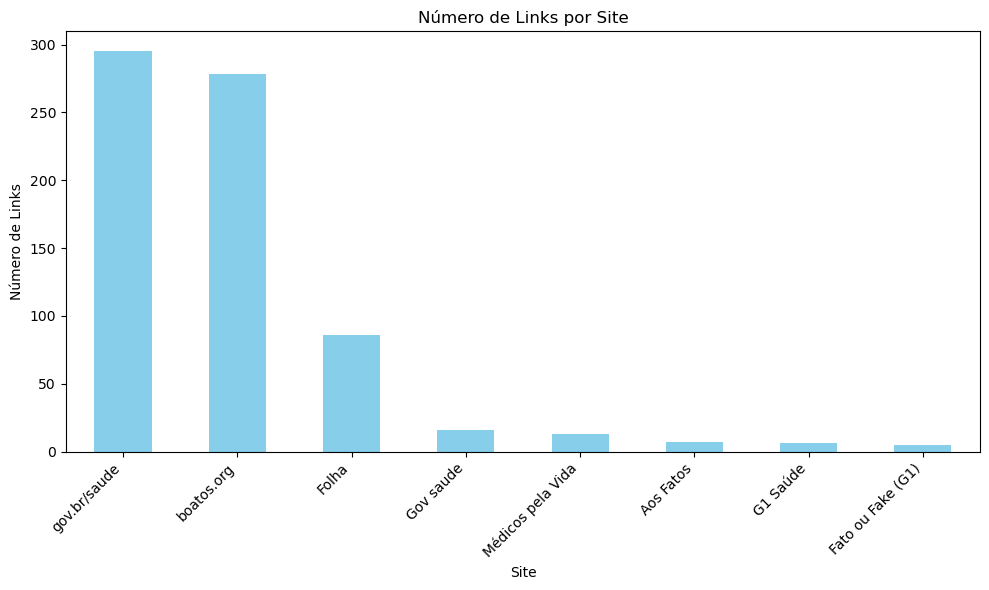

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df_combined já foi criado e contém a coluna 'site'

# Contar o número de links para cada site
site_counts = df_combined['Site'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
site_counts.plot(kind='bar', color='skyblue')
plt.title('Número de Links por Site')
plt.xlabel('Site')
plt.ylabel('Número de Links')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [15]:
noticias_fake = []

# Loop por todas as páginas que contêm artigos
for i in range(1, 59):  # Assumindo que existam até 58 páginas
    url = f"https://www.boatos.org/saude/page/{i}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Encontrar todos os artigos na página
    articles = soup.find_all('article')

    for article in articles:
        # Extrair o título do artigo
        title_tag = article.find('h2')
        title = title_tag.get_text(strip=True) if title_tag else None
        
        # Extrair o link da notícia desmentida (fake news)
        link_tag = article.find('a')
        fake_news_link = link_tag['href'] if link_tag and 'href' in link_tag.attrs else None
        
        # Filtrar apenas os links e títulos que contêm "vacina" ou "vacinacao"
        if fake_news_link and ("vacina" in fake_news_link.lower() or "vacinacao" in fake_news_link.lower()):
            
            # Acessar a página da fake news para encontrar a notícia original
            fake_response = requests.get(fake_news_link)
            fake_soup = BeautifulSoup(fake_response.content, "html.parser")
            
            # Tentar encontrar o link para a notícia original
            original_link_tag = fake_soup.find('a', text="Fonte original")
            original_link = original_link_tag['href'] if original_link_tag else None
            
            # Adicionar ao dataframe
            noticias_fake.append({
                "title": title,
                "fake_news_checked": fake_news_link,
                "fake_news_link": original_link
            })

# Converter a lista de notícias em um DataFrame do pandas
df_fake = pd.DataFrame(noticias_fake)

# Exibir o DataFrame
df_fake

,title,fake_news_checked,fake_news_link
0,Fake news sobre nanobots em vacinas contra Cov...,https://www.boatos.org/saude/nanobots-foram-en...,None
1,É falso que Brasil seja o único país do mundo ...,https://www.boatos.org/saude/brasil-e-o-unico-...,None
2,Homem que “pediu desculpas a não vacinados” nã...,https://www.boatos.org/saude/ministro-e-lider-...,None
3,Vídeo sobre sequelas severas das vacina contra...,https://www.boatos.org/saude/video-sobre-seque...,None
4,Não há provas de que vacinas e medicamentos es...,https://www.boatos.org/saude/faltam-vacinas-e-...,None
...,...,...,...
273,"Causa da microcefalia é vacina para gestantes,...",https://www.boatos.org/saude/causa-da-microcef...,None
274,Microcefalia foi causada por vacina vencida de...,https://www.boatos.org/saude/microcefalia-foi-...,None
275,Vacina contra o câncer de pele e rins é desenv...,https://www.boatos.org/saude/vacina-contra-can...,None
276,Vacina contra a gripe tem nível de mercúrio le...,https://www.boatos.org/saude/alerta-falso-vaci...,None


In [16]:
noticias_fake = []

# Loop por todas as páginas que contêm artigos
for i in range(1, 59):  # Assumindo que existam até 58 páginas
    url = f"https://www.boatos.org/saude/page/{i}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Encontrar todos os artigos na página
    articles = soup.find_all('article')

    for article in articles:
        # Extrair o título do artigo
        title_tag = article.find('h2')
        title = title_tag.get_text(strip=True) if title_tag else None
        
        # Extrair o link da notícia desmentida (fake news)
        link_tag = article.find('a')
        fake_news_link = link_tag['href'] if link_tag and 'href' in link_tag.attrs else None
        
        # Filtrar apenas os links e títulos que contêm "vacina" ou "vacinacao"
        if fake_news_link and ("vacina" in fake_news_link.lower() or "vacinacao" in fake_news_link.lower()):
            
            # Acessar a página da fake news para encontrar a notícia original
            fake_response = requests.get(fake_news_link)
            fake_soup = BeautifulSoup(fake_response.content, "html.parser")
            
            # Tentar encontrar o link para a notícia original
            original_link_tag = fake_soup.find('a', string=lambda text: "Fonte original" in text if text else False)
            original_link = original_link_tag['href'] if original_link_tag else None
            
            # Adicionar ao dataframe
            noticias_fake.append({
                "title": title,
                "fake_news_checked": fake_news_link,
                "original_news_link": original_link
            })

# Converter a lista de notícias em um DataFrame do pandas
df_fake = pd.DataFrame(noticias_fake)

# Exibir o DataFrame
df_fake

,title,fake_news_checked,original_news_link
0,Fake news sobre nanobots em vacinas contra Cov...,https://www.boatos.org/saude/nanobots-foram-en...,None
1,É falso que Brasil seja o único país do mundo ...,https://www.boatos.org/saude/brasil-e-o-unico-...,None
2,Homem que “pediu desculpas a não vacinados” nã...,https://www.boatos.org/saude/ministro-e-lider-...,None
3,Vídeo sobre sequelas severas das vacina contra...,https://www.boatos.org/saude/video-sobre-seque...,None
4,Não há provas de que vacinas e medicamentos es...,https://www.boatos.org/saude/faltam-vacinas-e-...,None
...,...,...,...
273,"Causa da microcefalia é vacina para gestantes,...",https://www.boatos.org/saude/causa-da-microcef...,None
274,Microcefalia foi causada por vacina vencida de...,https://www.boatos.org/saude/microcefalia-foi-...,None
275,Vacina contra o câncer de pele e rins é desenv...,https://www.boatos.org/saude/vacina-contra-can...,None
276,Vacina contra a gripe tem nível de mercúrio le...,https://www.boatos.org/saude/alerta-falso-vaci...,None
